In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.8 MB/s eta 0:00:00



Exibindo as funções de pertinência para 'Temperatura'...

Exibindo as funções de pertinência para 'Umidade'...

Exibindo as funções de pertinência para 'CO₂'...

Exibindo as funções de pertinência para 'Velocidade'...
Cenário 1 - Temperatura: 25°C, Umidade: 50%, CO₂: 500 ppm -> Velocidade: 50.00%
Cenário 2 - Temperatura: 35°C, Umidade: 80%, CO₂: 800 ppm -> Velocidade: 83.11%
Cenário 3 - Temperatura: 10°C, Umidade: 30%, CO₂: 200 ppm -> Velocidade: 20.42%

Gerando gráfico de barras com os cenários predefinidos...


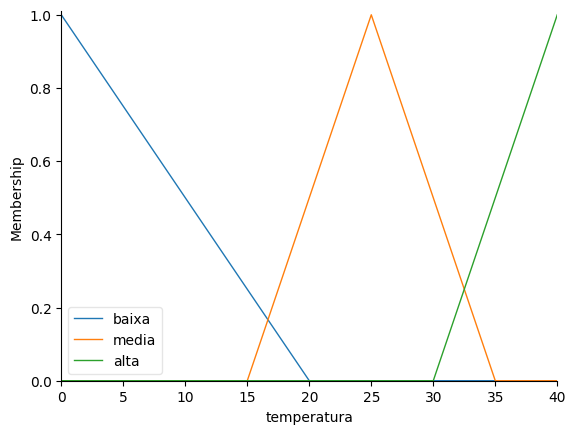

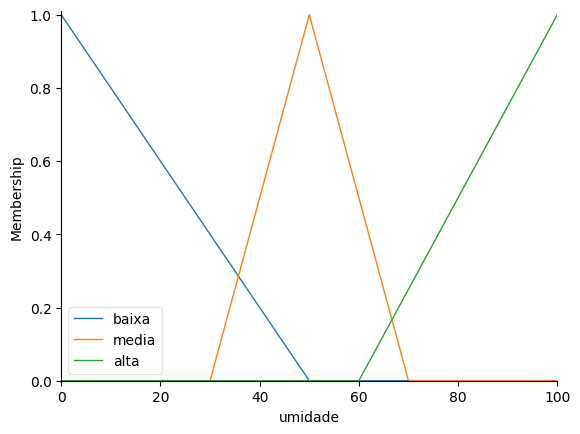

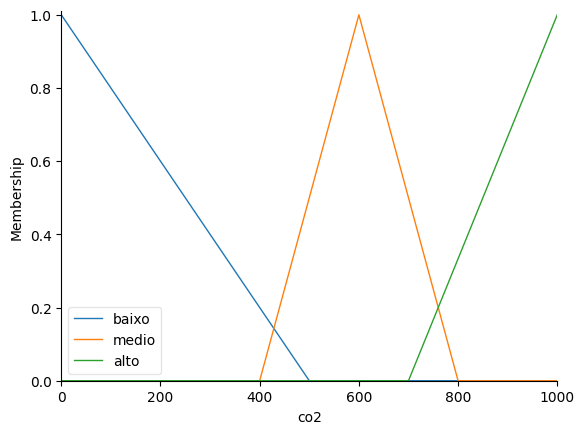

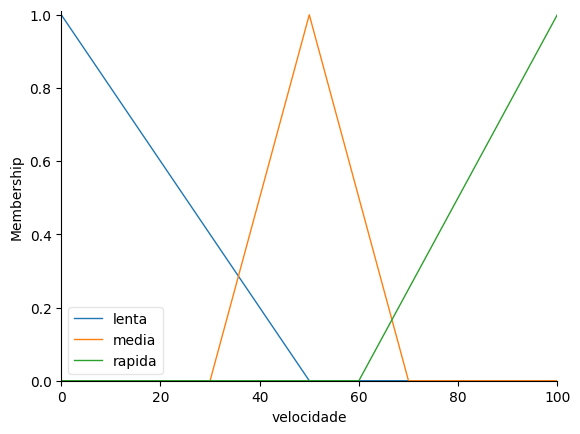

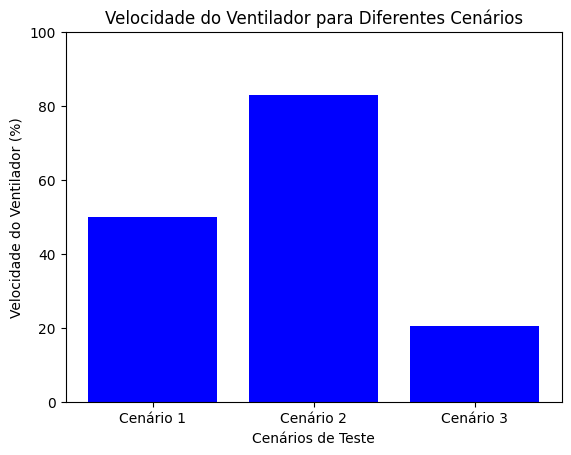


Gerando gráfico de superfície...


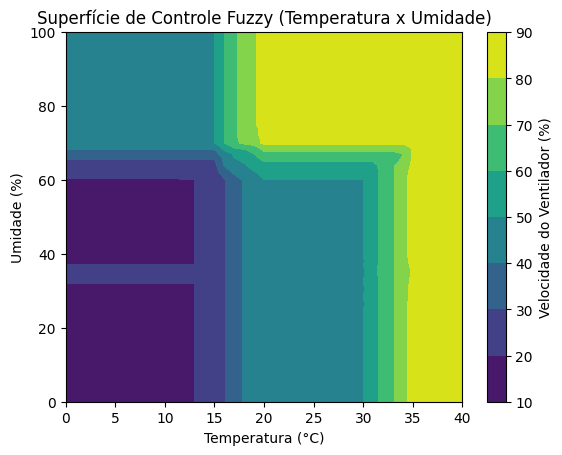

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definição das variáveis de entrada
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')
co2 = ctrl.Antecedent(np.arange(0, 1001, 1), 'co2')

# Variável de saída
velocidade = ctrl.Consequent(np.arange(0, 101, 1), 'velocidade')

# Definir funções de pertinência
temperatura['baixa'] = fuzz.trimf(temperatura.universe, [0, 0, 20])
temperatura['media'] = fuzz.trimf(temperatura.universe, [15, 25, 35])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [30, 40, 40])

umidade['baixa'] = fuzz.trimf(umidade.universe, [0, 0, 50])
umidade['media'] = fuzz.trimf(umidade.universe, [30, 50, 70])
umidade['alta'] = fuzz.trimf(umidade.universe, [60, 100, 100])

co2['baixo'] = fuzz.trimf(co2.universe, [0, 0, 500])
co2['medio'] = fuzz.trimf(co2.universe, [400, 600, 800])
co2['alto'] = fuzz.trimf(co2.universe, [700, 1000, 1000])

velocidade['lenta'] = fuzz.trimf(velocidade.universe, [0, 0, 50])
velocidade['media'] = fuzz.trimf(velocidade.universe, [30, 50, 70])
velocidade['rapida'] = fuzz.trimf(velocidade.universe, [60, 100, 100])

# Exibição das funções de pertinência de cada variável
# Visualização da temperatura
print("\nExibindo as funções de pertinência para 'Temperatura'...")
temperatura.view()

# Visualização da umidade
print("\nExibindo as funções de pertinência para 'Umidade'...")
umidade.view()

# Visualização do CO₂
print("\nExibindo as funções de pertinência para 'CO₂'...")
co2.view()

# Visualização da velocidade
print("\nExibindo as funções de pertinência para 'Velocidade'...")
velocidade.view()

# Definir regras fuzzy
rules = [
    ctrl.Rule(temperatura['baixa'] & umidade['baixa'] & co2['baixo'], velocidade['lenta']),
    ctrl.Rule(temperatura['baixa'] & umidade['media'] & co2['baixo'], velocidade['lenta']),
    ctrl.Rule(temperatura['baixa'] & umidade['alta'] & co2['baixo'], velocidade['lenta']),
    ctrl.Rule(temperatura['media'] & umidade['baixa'] & co2['baixo'], velocidade['media']),
    ctrl.Rule(temperatura['media'] & umidade['media'] & co2['baixo'], velocidade['media']),
    ctrl.Rule(temperatura['media'] & umidade['alta'] & co2['baixo'], velocidade['media']),
    ctrl.Rule(temperatura['alta'] & umidade['baixa'] & co2['baixo'], velocidade['rapida']),
    ctrl.Rule(temperatura['alta'] & umidade['media'] & co2['baixo'], velocidade['rapida']),
    ctrl.Rule(temperatura['alta'] & umidade['alta'] & co2['baixo'], velocidade['rapida']),
    ctrl.Rule(temperatura['baixa'] & umidade['baixa'] & co2['medio'], velocidade['lenta']),
    ctrl.Rule(temperatura['baixa'] & umidade['media'] & co2['medio'], velocidade['lenta']),
    ctrl.Rule(temperatura['baixa'] & umidade['alta'] & co2['medio'], velocidade['media']),
    ctrl.Rule(temperatura['media'] & umidade['baixa'] & co2['medio'], velocidade['media']),
    ctrl.Rule(temperatura['media'] & umidade['media'] & co2['medio'], velocidade['media']),
    ctrl.Rule(temperatura['media'] & umidade['alta'] & co2['medio'], velocidade['rapida']),
    ctrl.Rule(temperatura['alta'] & umidade['baixa'] & co2['medio'], velocidade['rapida']),
    ctrl.Rule(temperatura['alta'] & umidade['media'] & co2['medio'], velocidade['rapida']),
    ctrl.Rule(temperatura['alta'] & umidade['alta'] & co2['medio'], velocidade['rapida']),
    ctrl.Rule(temperatura['media'] & umidade['media'] & co2['alto'], velocidade['media']),
    ctrl.Rule(temperatura['alta'] & umidade['alta'] & co2['alto'], velocidade['rapida']),
]

# Configuração do sistema de controle
velocidade_ctrl = ctrl.ControlSystem(rules)
velocidade_sim = ctrl.ControlSystemSimulation(velocidade_ctrl)

# Testes predefinidos
cenarios = [
    {'temperatura': 25, 'umidade': 50, 'co2': 500},  # Cenário 1
    {'temperatura': 35, 'umidade': 80, 'co2': 800},  # Cenário 2
    {'temperatura': 10, 'umidade': 30, 'co2': 200},  # Cenário 3
]

resultados = []
for i, cenario in enumerate(cenarios):
    velocidade_sim.input['temperatura'] = cenario['temperatura']
    velocidade_sim.input['umidade'] = cenario['umidade']
    velocidade_sim.input['co2'] = cenario['co2']
    velocidade_sim.compute()
    resultado = velocidade_sim.output['velocidade']
    resultados.append(resultado)
    print(f"Cenário {i + 1} - Temperatura: {cenario['temperatura']}°C, Umidade: {cenario['umidade']}%, CO₂: {cenario['co2']} ppm -> Velocidade: {resultado:.2f}%")

# Gerar gráfico de barras com os resultados
print("\nGerando gráfico de barras com os cenários predefinidos...")
testes = [f"Cenário {i + 1}" for i in range(len(cenarios))]
plt.figure()
plt.bar(testes, resultados, color='blue')
plt.title('Velocidade do Ventilador para Diferentes Cenários')
plt.xlabel('Cenários de Teste')
plt.ylabel('Velocidade do Ventilador (%)')
plt.ylim(0, 100)
plt.show()

# Gerar gráfico de superfície
print("\nGerando gráfico de superfície...")
x, y = np.meshgrid(
    np.arange(0, 41, 1),  # Temperatura
    np.arange(0, 101, 1)  # Umidade
)
z = np.zeros_like(x)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        velocidade_sim.input['temperatura'] = x[i, j]
        velocidade_sim.input['umidade'] = y[i, j]
        velocidade_sim.input['co2'] = 600  # Valor fixo de exemplo
        velocidade_sim.compute()
        z[i, j] = velocidade_sim.output['velocidade']

plt.figure()
plt.contourf(x, y, z, cmap='viridis')
plt.title('Superfície de Controle Fuzzy (Temperatura x Umidade)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.colorbar(label='Velocidade do Ventilador (%)')
plt.show()